In [1]:
import tensorflow

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# Устанавливаем seed для повторяемости результатов


Using TensorFlow backend.


In [213]:
import numpy as np
import cv2 as cv
numpy.random.seed(42)


In [78]:
import os
import json
import pandas as pd
import numpy as np
import scipy.sparse as sp
from lxml import etree
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [40]:
path = "C:\\Users\\lenar\\Pictures\\crop_head\\"
path_out = "C:\\Users\\lenar\\Music\\"

In [41]:
def image_show(path):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

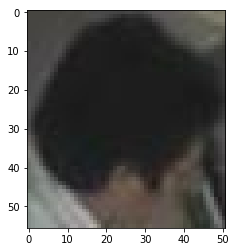

In [47]:
image_show(path + "person (10).jpg - 0.jpg")

In [43]:
from PIL import Image
 
def resize_image(input_image_path,
                 output_image_path,
                 size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print('The original image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
 
    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print('The resized image size is {wide} wide x {height} '
          'high'.format(wide=width, height=height))
    resized_image.show()
    resized_image.save(output_image_path)

In [48]:
 resize_image(input_image_path= path + "person (10).jpg - 0.jpg",
            output_image_path= path_out + "person (10).jpg - 0.jpg",
            size=(60, 80))

The original image size is 51 wide x 56 high
The resized image size is 60 wide x 80 high


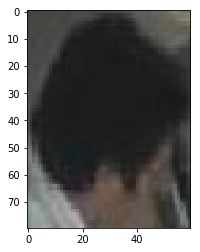

In [49]:
image_show(path_out + "person (10).jpg - 0.jpg")

In [125]:
path = "C:\\Users\\lenar\\Pictures\\resize_crop\\"

print(files_with_kaska[:3])
print(files_head[:3])

print(len(files_with_kaska))
print(len(files_head))

['with_kaska (1).jpg - 0.jpg', 'with_kaska (1).jpg - 1.jpg', 'with_kaska (10).jpg - 0.jpg']
['person (1).jpg - 0.jpg', 'person (1).jpg - 1.jpg', 'person (10).jpg - 0.jpg']
6320
19522


In [220]:
image = cv.imread(path+ 'with_kaska (1).jpg - 0.jpg')
image.shape

(80, 60, 3)

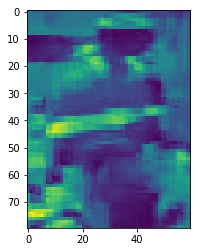

In [215]:
image = cv.imread(path+ 'with_kaska (1).jpg - 0.jpg')
rgb = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(rgb)

In [121]:
rgb

array([[ 91,  90,  85, ...,  47,  46,  48],
       [100,  99,  95, ...,  62,  59,  61],
       [ 93,  92,  90, ...,  61,  56,  56],
       ...,
       [102,  71,  72, ...,  84, 101, 107],
       [113,  71,  75, ...,  90,  98, 100],
       [ 91,  30,  23, ..., 118, 113, 107]], dtype=uint8)

In [111]:
label = np.zeros(len(files_with_kaska), dtype = int)

In [113]:
label1 = np.ones(len(files_head), dtype = int)

In [552]:
kaska = list(zip(files_with_kaska, label))
head = list(zip(files_head, label1))

In [553]:
kek = kaska + head

In [554]:
len(kek)

25842

In [555]:
kek[:10]

[('with_kaska (1).jpg - 0.jpg', 0),
 ('with_kaska (1).jpg - 1.jpg', 0),
 ('with_kaska (10).jpg - 0.jpg', 0),
 ('with_kaska (10).jpg - 1.jpg', 0),
 ('with_kaska (100).jpg - 0.jpg', 0),
 ('with_kaska (100).jpg - 1.jpg', 0),
 ('with_kaska (1000).jpg - 0.jpg', 0),
 ('with_kaska (1000).jpg - 1.jpg', 0),
 ('with_kaska (1000).jpg - 2.jpg', 0),
 ('with_kaska (1001).jpg - 0.jpg', 0)]

In [556]:
kek[-10:]

[('person (618).jpg - 0.jpg', 1),
 ('person (619).jpg - 0.jpg', 1),
 ('person (620).jpg - 0.jpg', 1),
 ('person (621).jpg - 0.jpg', 1),
 ('person (622).jpg - 0.jpg', 1),
 ('person (623).jpg - 0.jpg', 1),
 ('person (624).jpg - 0.jpg', 1),
 ('person (625).jpg - 0.jpg', 1),
 ('person (626).jpg - 0.jpg', 1),
 ('person (627).jpg - 0.jpg', 1)]

In [557]:
from random import shuffle
shuffle(kek)

In [558]:
kek[:10]

[('with_kaska (2971).jpg - 0.jpg', 0),
 ('person (3462).jpg - 13.jpg', 1),
 ('person (2877).jpg - 1.jpg', 1),
 ('with_kaska (3397).jpg - 1.jpg', 0),
 ('with_kaska (916).jpg - 0.jpg', 0),
 ('person (2505).jpg - 1.jpg', 1),
 ('person (1873).jpg - 9.jpg', 1),
 ('person (3482).jpg - 9.jpg', 1),
 ('person (2711).jpg - 5.jpg', 1),
 ('with_kaska (1095).jpg - 3.jpg', 0)]

In [559]:
files = os.listdir(path)

In [560]:
len(files)

25842

In [561]:
X = []
y = []

In [563]:
for i in kek:
    image = cv.imread(path + i[0])
    #rgb = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    X.append(image)
    y.append(i[1])

In [564]:
print(len(X))
print(len(y))

25842
25842


In [565]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [566]:
X_train = np.reshape(X_train, (18089, 60, 80, 3))
X_test = np.reshape(X_test, (7753, 60, 80, 3))

In [567]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [568]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

In [515]:
Y_train[0]

array([0., 1.], dtype=float32)

In [486]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [174]:

# Преобразование размерности изображений

# Нормализация данных
model.add(Conv2D(50, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

# Преобразуем метки в категории

model.add(Conv2D(50, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# Создаем последовательную модель

In [598]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(60, 80, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Компилируем модель
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

# Обучаем сеть


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 58, 78, 64)        1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 29, 39, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 27, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 18, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 13, 18, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 8, 128)         0         
__________

In [599]:
model.fit(X_train, Y_train, batch_size=50, epochs=10, validation_split=0.2, verbose=1)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Train on 14471 samples, validate on 3618 samples
Epoch 1/10
14471/14471 [==============================] - 395s 27ms/step - loss: 0.3291 - acc: 0.8597 - val_loss: 0.2016 - val_acc: 0.9154
Epoch 2/10
14471/14471 [==============================] - 410s 28ms/step - loss: 0.1706 - acc: 0.9309 - val_loss: 0.1658 - val_acc: 0.9467
Epoch 3/10
14471/14471 [==============================] - 405s 28ms/step - loss: 0.1446 - acc: 0.9457 - val_loss: 0.1652 - val_acc: 0.9295
Epoch 4/10
14471/14471 [==============================] - 403s 28ms/step - loss: 0.1337 - acc: 0.9502 - val_loss: 0.1406 - val_acc: 0.9497
Epoch 5/10
14471/14471 [==============================] - 392s 27ms/step - loss: 0.1206 - acc: 0.9564 - val_loss: 0.2247 - val_acc: 0.8969
Epoch 6/10
14471/14471 [==============================] - 401s 28ms/step - loss: 0.1096 - acc: 0.9619 - val_loss: 0.1254 - val_acc: 0.9558
Epoch 7/10
14471/14471 [==============================] - 412s 28ms/step - loss: 0.1049 - acc: 0.9619 - val_loss: 0.1

In [549]:
model.fit(X_train, Y_train, batch_size=50, epochs=1, validation_split=0.2, verbose=1)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Train on 14471 samples, validate on 3618 samples
Epoch 1/1
14471/14471 [==============================] - 19730s 1s/step - loss: 0.3159 - acc: 0.8622 - val_loss: 0.2335 - val_acc: 0.8886
Точность работы на тестовых данных: 88.28%


In [600]:
result = model.predict(test)
scores = model.evaluate(test, r, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 90.00%


In [573]:
test = []

In [574]:
kekk = os.listdir("C:\\Users\\lenar\\Pictures\\crop_test\\")
for i in kekk:
    print(i)
    image = cv.imread("C:\\Users\\lenar\\Pictures\\crop_test\\" + i)
    #rgb = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    test.append(image)

144162615088.jpg - 0.jpg
144162615088.jpg - 1.jpg
144162615088.jpg - 2.jpg
68764635468.jpg - 0.jpg
68764635468.jpg - 1.jpg
68764635468.jpg - 2.jpg
68764635468.jpg - 3.jpg
big_1487306756_image.jpg - 0.jpg
big_1487306756_image.jpg - 1.jpg
big_1487306756_image.jpg - 2.jpg
big_1487306756_image.jpg - 3.jpg
big_1487306756_image.jpg - 4.jpg
b_4fd5f931428576042ec488b52d2a07d2.jpg - 0.jpg
c91c57842df6bb270e1dcae0c227d8e9.jpg - 0.jpg
c91c57842df6bb270e1dcae0c227d8e9.jpg - 1.jpg
c91c57842df6bb270e1dcae0c227d8e9.jpg - 2.jpg
c91c57842df6bb270e1dcae0c227d8e9.jpg - 3.jpg
depositphotos_103224466-stock-photo-workers-at-the-construction-site.jpg - 0.jpg
depositphotos_103224466-stock-photo-workers-at-the-construction-site.jpg - 1.jpg
depositphotos_103224466-stock-photo-workers-at-the-construction-site.jpg - 2.jpg
depositphotos_186390900-stock-photo-workers-construction-site-industrial-building.jpg - 0.jpg
depositphotos_186390900-stock-photo-workers-construction-site-industrial-building.jpg - 1.jpg
deposi

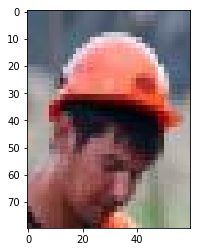

In [268]:
image_show("C:\\Users\\lenar\\Pictures\\crop_test\\" + kek[1])

In [269]:
image = cv.imread("C:\\Users\\lenar\\Pictures\\crop_test\\" + kek[1])

In [270]:
rgb = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [271]:
rgb.shape

(80, 60)

In [326]:
for i in kek[:10]:
    print(i)

144162615088.jpg - 0.jpg
144162615088.jpg - 1.jpg
144162615088.jpg - 2.jpg
68764635468.jpg - 0.jpg
68764635468.jpg - 1.jpg
68764635468.jpg - 2.jpg
68764635468.jpg - 3.jpg
big_1487306756_image.jpg - 0.jpg
big_1487306756_image.jpg - 1.jpg
big_1487306756_image.jpg - 2.jpg


In [277]:
test[0]

array([[160, 161, 164, ..., 187, 186, 184],
       [157, 158, 160, ..., 183, 182, 181],
       [154, 154, 155, ..., 178, 177, 176],
       ...,
       [111, 109,  92, ..., 126, 130, 132],
       [ 71,  73,  71, ..., 124, 127, 128],
       [ 74,  76,  74, ..., 126, 129, 129]], dtype=uint8)

In [522]:
len(test)

130

In [575]:
test = np.reshape(test, (130, 60,80,3))
test = test.astype('float32')
test /= 255

In [581]:
def detect_disease(test_image): 
    test = cv.imread("C:\\Users\\lenar\\Pictures\\crop_test\\" + test_image)
    #test = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    test = test.reshape(1, 60,80, 3)
    test = test.astype('float32')
    test /= 255
    result = model.predict(test)
    if round(result[0][1])==0:
        prediction='в каске'
    else:
        prediction='без каски'
    print(prediction)

--------------------------------------------------


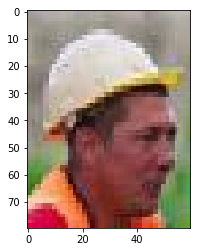

0
в каске
--------------------------------------------------


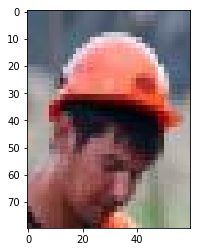

1
в каске
--------------------------------------------------


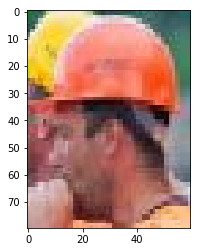

2
в каске
--------------------------------------------------


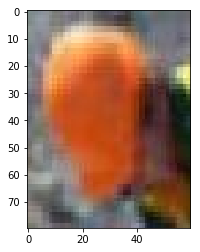

3
в каске
--------------------------------------------------


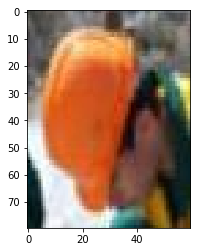

4
в каске
--------------------------------------------------


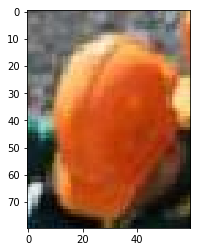

5
в каске
--------------------------------------------------


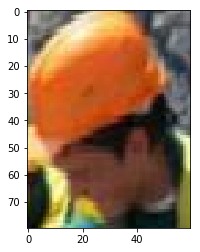

6
в каске
--------------------------------------------------


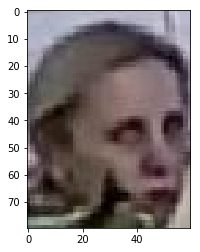

7
без каски
--------------------------------------------------


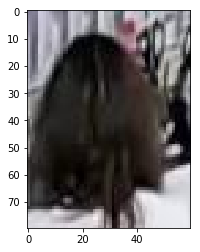

8
без каски
--------------------------------------------------


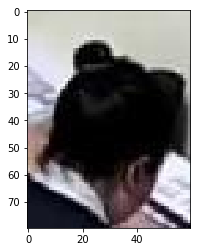

9
без каски
--------------------------------------------------


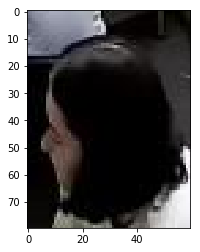

10
без каски
--------------------------------------------------


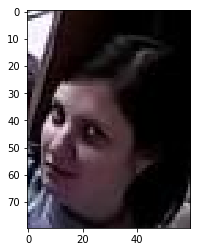

11
без каски
--------------------------------------------------


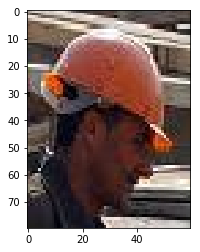

12
в каске
--------------------------------------------------


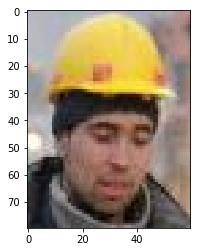

13
в каске
--------------------------------------------------


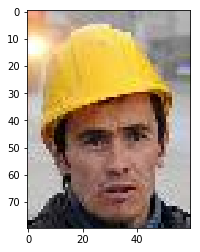

14
в каске
--------------------------------------------------


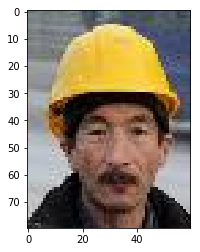

15
в каске
--------------------------------------------------


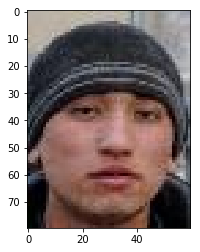

16
без каски
--------------------------------------------------


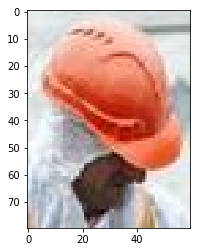

17
в каске
--------------------------------------------------


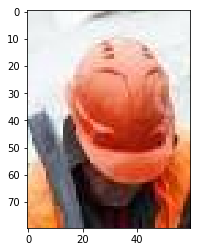

18
в каске
--------------------------------------------------


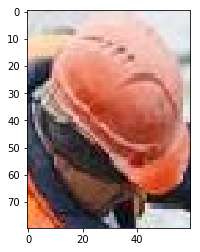

19
в каске
--------------------------------------------------


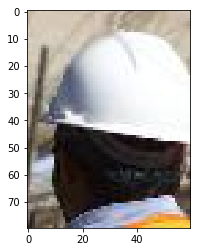

20
в каске
--------------------------------------------------


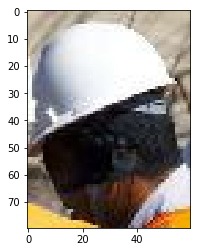

21
в каске
--------------------------------------------------


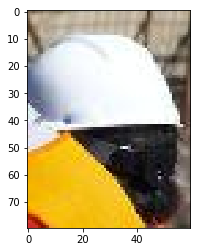

22
в каске
--------------------------------------------------


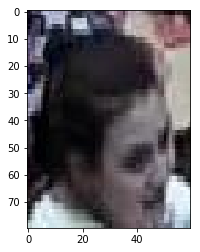

23
без каски
--------------------------------------------------


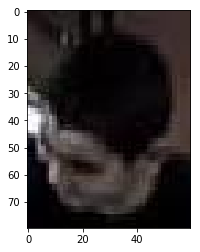

24
без каски
--------------------------------------------------


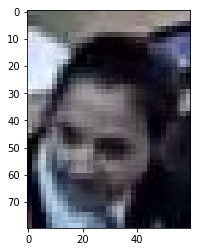

25
без каски
--------------------------------------------------


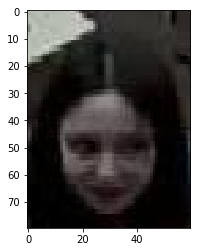

26
без каски
--------------------------------------------------


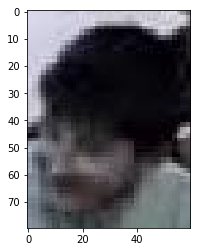

27
без каски
--------------------------------------------------


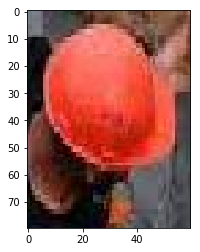

28
в каске
--------------------------------------------------


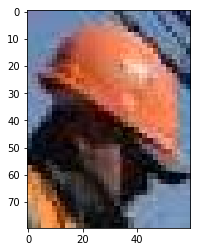

29
в каске
--------------------------------------------------


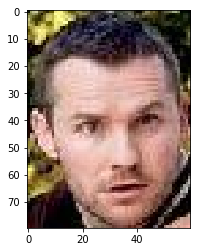

30
без каски
--------------------------------------------------


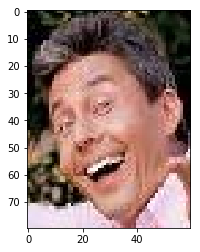

31
без каски
--------------------------------------------------


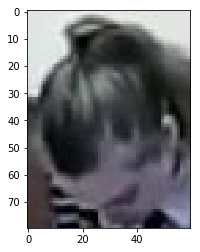

32
без каски
--------------------------------------------------


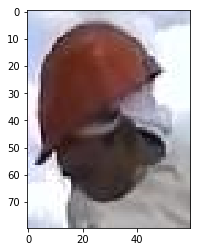

33
без каски
--------------------------------------------------


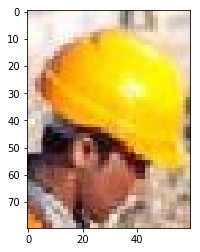

34
в каске
--------------------------------------------------


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000000079B39630>>
Traceback (most recent call last):
  File "c:\users\lenar\anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\client\session.py", line 1453, in __del__
    with errors.raise_exception_on_not_ok_status() as status:
  File "c:\users\lenar\anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 519, in __enter__
    self.status = c_api_util.ScopedTFStatus()
  File "c:\users\lenar\anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 33, in __init__
    self.status = c_api.TF_NewStatus()
KeyboardInterrupt
Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x00000000DD496F98>>
Traceback (most recent call last):
  File "c:\users\lenar\anaconda3\envs\keras-gpu\lib\site-packages\tens

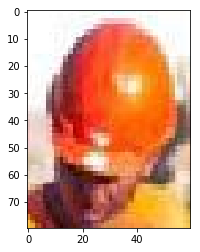

35
в каске
--------------------------------------------------


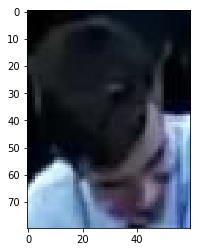

36
без каски
--------------------------------------------------


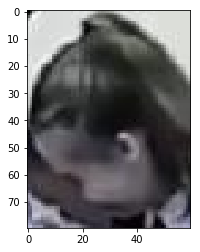

37
без каски
--------------------------------------------------


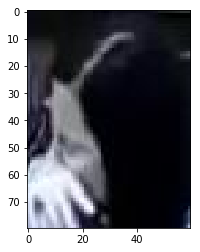

38
без каски
--------------------------------------------------


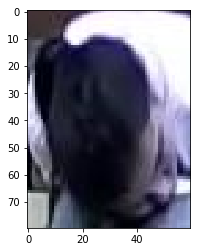

39
без каски
--------------------------------------------------


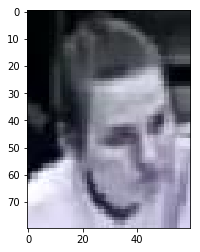

40
без каски
--------------------------------------------------


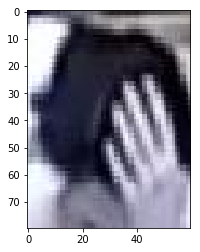

41
без каски
--------------------------------------------------


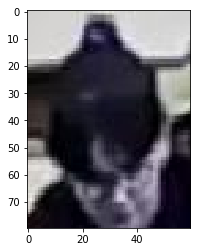

42
без каски
--------------------------------------------------


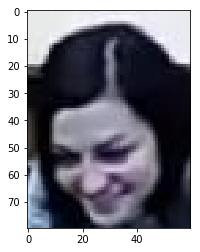

43
без каски
--------------------------------------------------


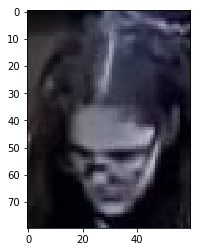

44
без каски
--------------------------------------------------


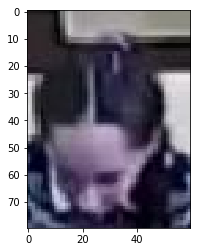

45
без каски
--------------------------------------------------


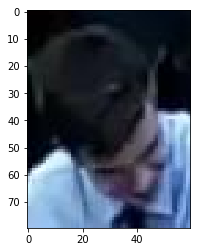

46
без каски
--------------------------------------------------


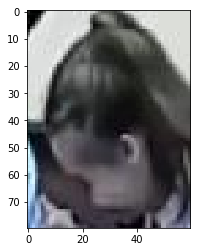

47
без каски
--------------------------------------------------


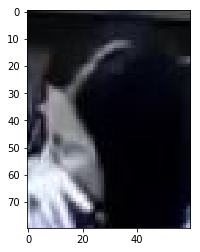

48
без каски
--------------------------------------------------


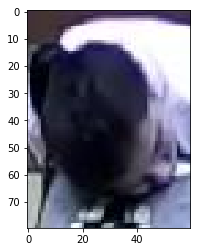

49
без каски
--------------------------------------------------


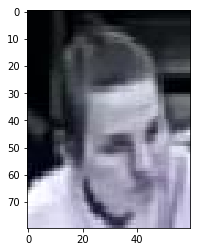

50
без каски
--------------------------------------------------


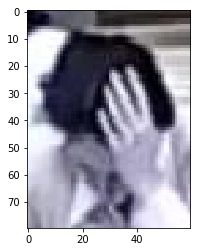

51
без каски
--------------------------------------------------


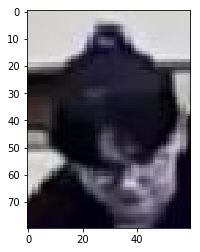

52
без каски
--------------------------------------------------


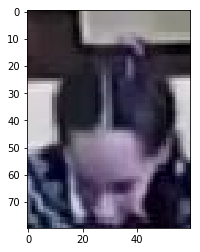

53
без каски
--------------------------------------------------


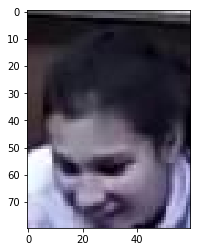

54
без каски
--------------------------------------------------


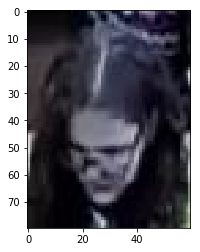

55
без каски
--------------------------------------------------


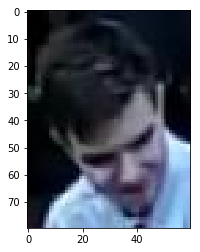

56
без каски
--------------------------------------------------


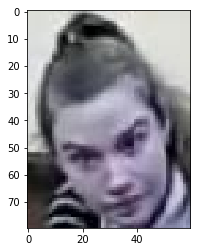

57
без каски
--------------------------------------------------


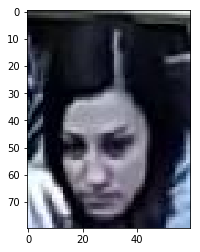

58
без каски
--------------------------------------------------


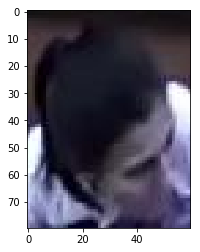

59
без каски
--------------------------------------------------


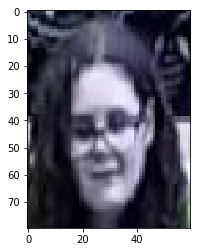

60
без каски
--------------------------------------------------


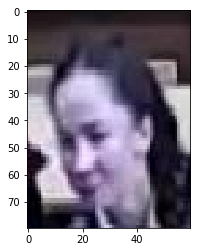

61
без каски
--------------------------------------------------


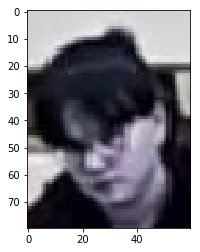

62
без каски
--------------------------------------------------


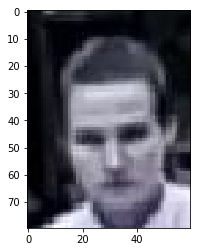

63
без каски
--------------------------------------------------


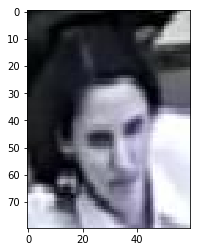

64
без каски
--------------------------------------------------


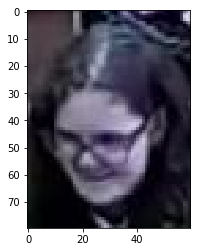

65
без каски
--------------------------------------------------


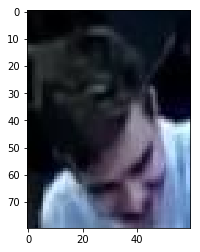

66
без каски
--------------------------------------------------


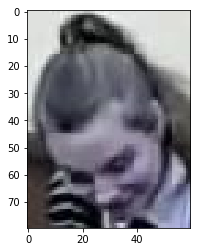

67
без каски
--------------------------------------------------


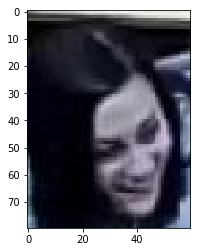

68
без каски
--------------------------------------------------


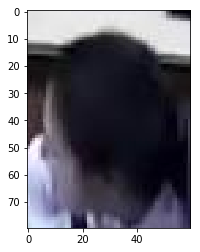

69
без каски
--------------------------------------------------


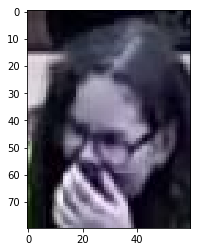

70
без каски
--------------------------------------------------


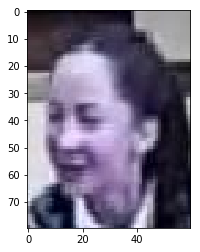

71
без каски
--------------------------------------------------


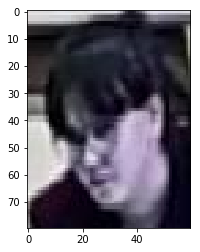

72
без каски
--------------------------------------------------


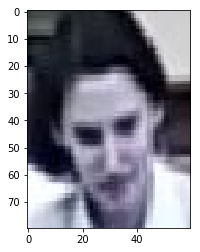

73
без каски
--------------------------------------------------


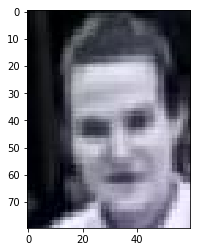

74
без каски
--------------------------------------------------


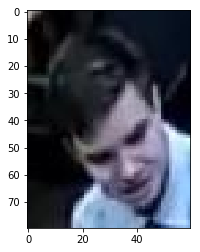

75
без каски
--------------------------------------------------


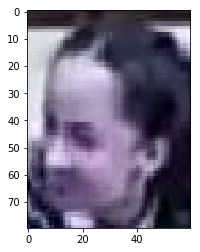

76
без каски
--------------------------------------------------


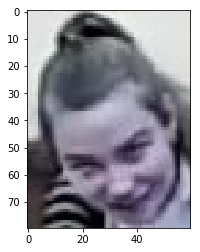

77
без каски
--------------------------------------------------


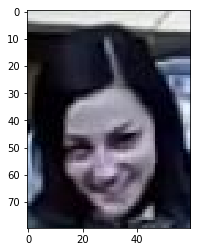

78
без каски
--------------------------------------------------


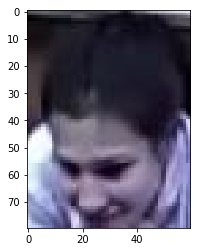

79
без каски
--------------------------------------------------


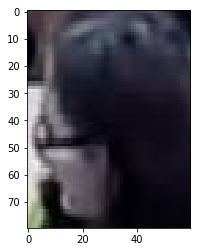

80
без каски
--------------------------------------------------


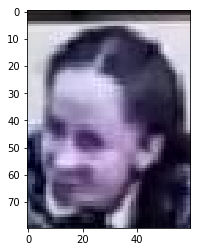

81
без каски
--------------------------------------------------


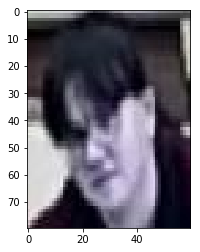

82
без каски
--------------------------------------------------


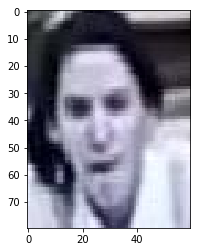

83
без каски
--------------------------------------------------


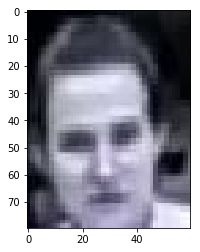

84
без каски
--------------------------------------------------


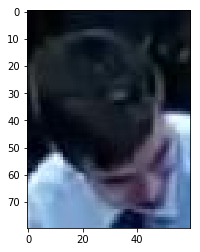

85
без каски
--------------------------------------------------


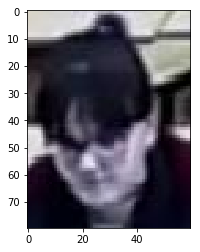

86
без каски
--------------------------------------------------


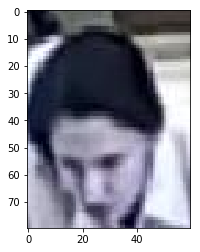

87
без каски
--------------------------------------------------


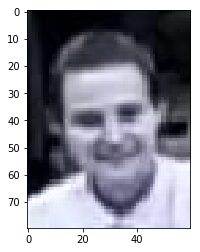

88
без каски
--------------------------------------------------


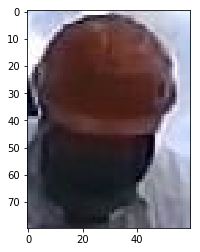

89
без каски
--------------------------------------------------


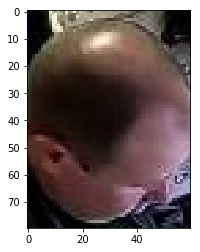

90
без каски
--------------------------------------------------


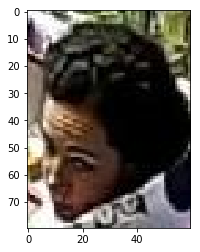

91
без каски
--------------------------------------------------


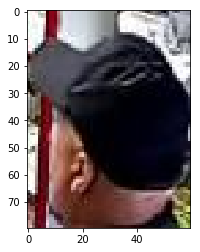

92
без каски
--------------------------------------------------


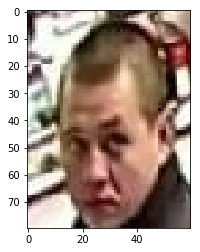

93
без каски
--------------------------------------------------


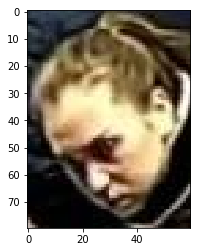

94
без каски
--------------------------------------------------


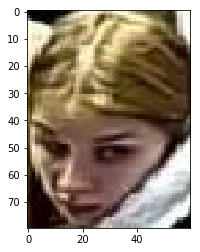

95
без каски
--------------------------------------------------


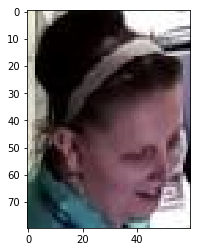

96
без каски
--------------------------------------------------


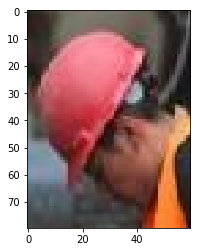

97
в каске
--------------------------------------------------


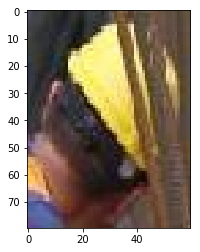

98
в каске
--------------------------------------------------


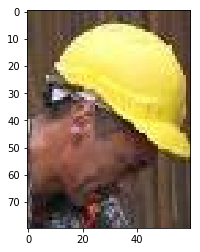

99
в каске
--------------------------------------------------


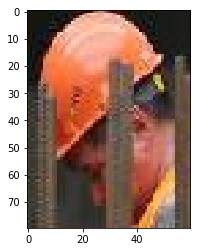

100
в каске
--------------------------------------------------


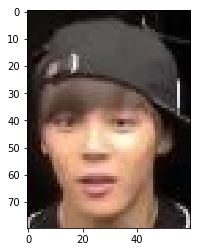

101
без каски
--------------------------------------------------


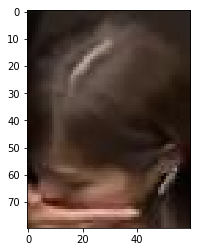

102
без каски
--------------------------------------------------


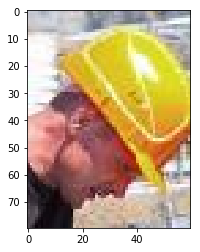

103
в каске
--------------------------------------------------


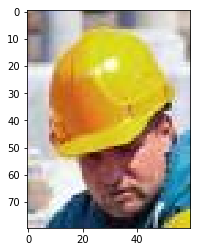

104
в каске
--------------------------------------------------


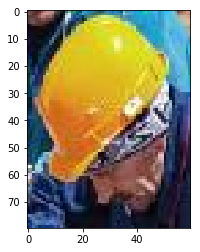

105
в каске
--------------------------------------------------


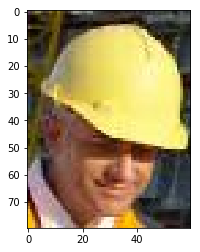

106
в каске
--------------------------------------------------


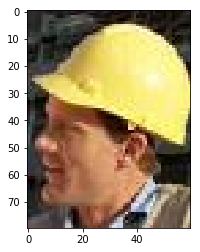

107
в каске
--------------------------------------------------


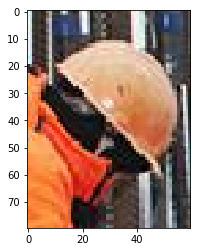

108
в каске
--------------------------------------------------


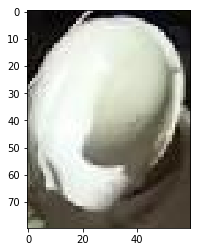

109
в каске
--------------------------------------------------


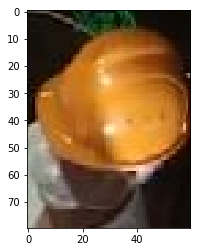

110
в каске
--------------------------------------------------


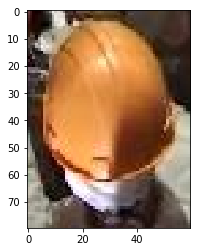

111
в каске
--------------------------------------------------


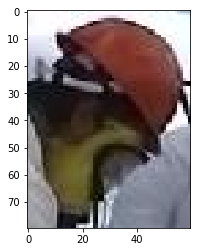

112
без каски
--------------------------------------------------


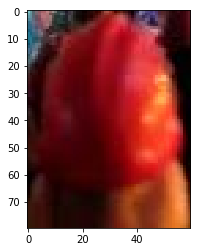

113
в каске
--------------------------------------------------


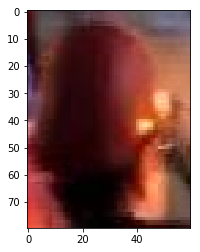

114
без каски
--------------------------------------------------


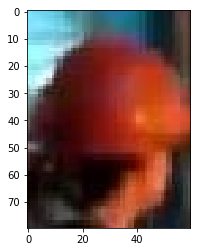

115
в каске
--------------------------------------------------


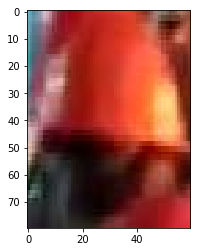

116
в каске
--------------------------------------------------


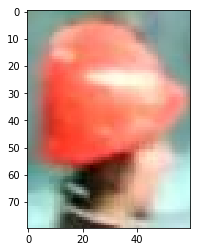

117
в каске
--------------------------------------------------


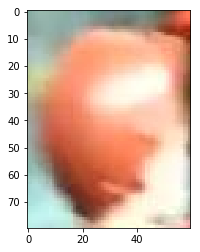

118
в каске
--------------------------------------------------


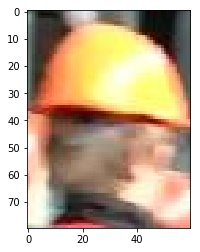

119
в каске
--------------------------------------------------


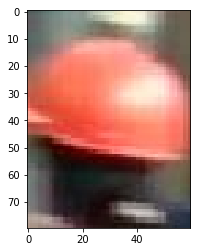

120
в каске
--------------------------------------------------


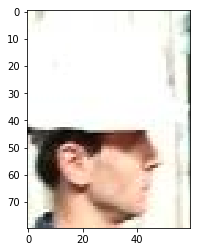

121
в каске
--------------------------------------------------


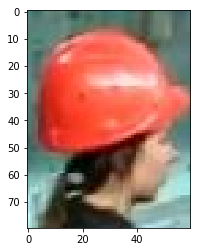

122
в каске
--------------------------------------------------


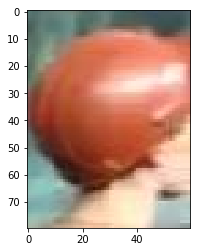

123
в каске
--------------------------------------------------


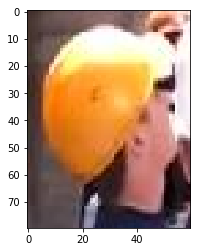

124
в каске
--------------------------------------------------


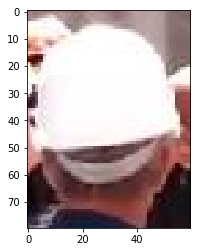

125
в каске
--------------------------------------------------


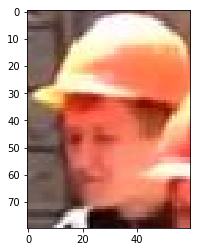

126
в каске
--------------------------------------------------


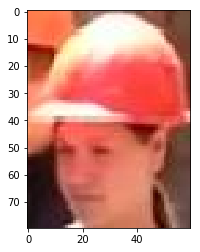

127
в каске
--------------------------------------------------


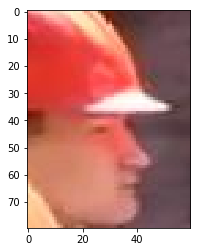

128
в каске
--------------------------------------------------


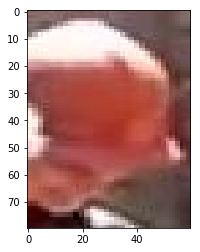

129
в каске


In [582]:
for j, i in enumerate(kekk):
    print("--------------------------------------------------")
    image_show("C:\\Users\\lenar\\Pictures\\crop_test\\" + i)
    print(j)
    detect_disease(i)


In [370]:
result = model.predict(test)

In [397]:
res = []
for i in result:
    res.append(int(round(i[1])))

In [440]:
result[0]

array([0.9987595 , 0.00124047], dtype=float32)

In [480]:
result = model.predict(test)
scores = model.evaluate(test, r, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 93.85%


In [434]:
test = test.reshape(130,4800)

In [441]:
res[0]

0

In [471]:
r = []

In [472]:
for i in res:
    r.append([1 - i, i])

In [476]:
Y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [478]:
r = np.array(r)

In [336]:
def detect_disease(test_image):
    test_image=image.load_img(test_image,target_size=(60,80))
    test_image=image.img_to_array(test_image)
    result=model.predict(test_image)
    if result[0][0]==1:
        prediction='без каски'
    else:
        prediction='в каске'
    print(prediction)

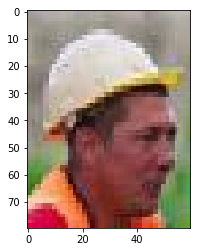

ValueError: Error when checking input: expected dense_15_input to have 2 dimensions, but got array with shape (60, 80, 3)

In [337]:
for i in kek:
    im = plt.imread("C:\\Users\\lenar\\Pictures\\crop_test\\" + i)
    image_show("C:\\Users\\lenar\\Pictures\\crop_test\\" + i)
    detect_disease("C:\\Users\\lenar\\Pictures\\crop_test\\" + i)

In [344]:
X_test.shape

(7753, 4800)

In [351]:
y= test[8].reshape(1,4800)
print(y.shape)

(1, 4800)


In [352]:
prediction = model.predict(y)
print(prediction)

[[3.8812673e-06 9.9999607e-01]]
